(1) Bu ödevde, modelinizi kullanarak Titanic faciasında hayatta kalma durumunu tahmin edeceksiniz.

Verilerinizi eğitim ve test kümelerine ayırın.
Modelinizi oluşturarak ayırdığınız test kümesindeki verilere göre hayatta kalma durumlarını tahmin edin
Modelinizin performansı tatmin edici mi? Açıklayın.
Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın.

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')


In [120]:
df = pd.read_csv("https://storage.googleapis.com/kagglesdsdata/competitions/3136/26502/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1619022461&Signature=YYgjqe7orqvSPdr9iSz2R3XADmpPrI1Ee4qZzcTQNyovPepMdPe5EZ1z%2FLHWLdKS7zmarnBQ8zwlPInvoFcrq%2BjltMdOAw5%2BE%2FpMZSNdSsaPIFQwoL8%2BJmdHWnNnRvV%2BPFUwROEGaSOmKGomrGp4gLZk2z6RyowEf9n88XSph65VayLBNz2QQaByWc5HnIB5xDLPuxX9mf9Y95lQwVhyUavkbyvh7mcihOh9DLddrGR47O4VaEQyc%2BxzyFO2i9d9IjkH7D6eoikMyZ3WZtLfz2%2BEZ1thjRaY1oeOTDC30S78wfoGLpW5yopB8XzJCc76QeWRaALVfYHKDuAOnJ7DKA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv")

In [121]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
df["Sex"]=pd.get_dummies(df["Sex"],drop_first=True)

In [124]:
df=df.drop("Name",axis=1)

In [125]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [126]:
df=df.drop("Cabin",axis=1)

In [127]:
df["Age"]=df["Age"].fillna(df["Age"].mean())


In [128]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [129]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [130]:
print("How many 'S' on embarked column : " , df[df['Embarked'] == 'S'].shape[0])
print("How many 'C' on embarked column : " ,df[df['Embarked'] == 'C'].shape[0])
print("How many 'Q' on embarked column : ",df[df['Embarked'] == 'Q'].shape[0])

How many 'S' on embarked column :  644
How many 'C' on embarked column :  168
How many 'Q' on embarked column :  77


In [131]:
df = df.fillna({'Embarked' : 'S'})

In [132]:
df=df.drop("Embarked",axis=1)

In [133]:
df=df.drop("Ticket",axis=1)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    uint8  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), uint8(1)
memory usage: 49.7 KB


In [135]:
y=df["Survived"]
x=df.drop("Survived",axis=1)

In [136]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [137]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(x, y, test_size=0.20, random_state=111)

In [138]:
#Eğitim için ayırdığımız verilerle modeli eğitelim.
log_reg.fit(X_eğitim, y_eğitim)

LogisticRegression()

In [139]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print(
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')
#One-vs-rest', '-'*20, 


#log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#log_reg_mnm.fit(X_eğitim, y_eğitim)
#egitim_dogruluk = log_reg_mnm.score(X_eğitim, y_eğitim)
#test_dogruluk = log_reg_mnm.score(X_test, y_test)
#print('Multinomial (Softmax)', '-'*20, 
#      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
#     'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Modelin eğitim verisindeki doğruluğu : 0.79
Modelin test verisindeki doğruluğu   : 0.78


In [140]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_eğitim, y_eğitim),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)    

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.693820,0.659218
1,0.010,0.737360,0.737430
2,0.100,0.785112,0.770950
3,1.000,0.789326,0.776536
4,10.000,0.787921,0.776536
5,100.000,0.785112,0.770950
6,1000.000,0.804775,0.793296


In [149]:
y_pred=log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [142]:
x=df.drop("PassengerId",axis=1)

In [164]:
x=df.drop("Survived",axis=1)

In [165]:
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(x, y, test_size=0.20, random_state=111)

In [166]:
log_reg.fit(X_eğitim, y_eğitim)

LogisticRegression()

In [167]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print(
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Modelin eğitim verisindeki doğruluğu : 0.79
Modelin test verisindeki doğruluğu   : 0.78


In [168]:
from sklearn.linear_model import LogisticRegression
tahmin_eğitim = log_reg.predict(X_eğitim)
tahmin_test = log_reg.predict(X_test)

Modelinizin performansına bu derste öğrendiğiniz metriklerlerle değerlendiriniz.
ROC eğrisi ve Hassasiyet/Duyarlılık Eğrisini farklı "c" değerleri için çizdirin.

In [ ]:
#from sklearn.metrics import accuracy_score, confusion_matrix
#accuracy_score(y_pred, y_test)
#confusion_matrix(y_pred, y_test)

In [169]:
from sklearn.metrics import confusion_matrix,accuracy_score
hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)

In [170]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[373  63]
 [ 87 189]]
Hata Matrisi (Test verileri)
------------------------------
[[95 18]
 [22 44]]


In [171]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 95
Doğru pozitif sayısı   : 44
Yanlış pozitif sayısı  : 18
Yanlış negatif sayısı  : 22


In [172]:
print("accuracy_score() değeri         : ",  accuracy_score(y_test, tahmin_test))

accuracy_score() değeri         :  0.776536312849162


In [173]:
from sklearn.metrics import precision_score
print("precision_score() değeri        : ",  precision_score(y_test, tahmin_test))

precision_score() değeri        :  0.7096774193548387


In [174]:
from sklearn.metrics import recall_score
print("recall_score() değeri        : ",  recall_score(y_test, tahmin_test))

recall_score() değeri        :  0.6666666666666666


In [175]:
from sklearn.metrics import f1_score
print("f1_score() değeri     : ",  f1_score(y_test, tahmin_test))

f1_score() değeri     :  0.6875


In [176]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,tahmin_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(y_test, tahmin_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test, tahmin_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test, tahmin_test)))
print('\n')

metrikler =  precision_recall_fscore_support(y_test, tahmin_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       113
           1       0.71      0.67      0.69        66

    accuracy                           0.78       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179

f1_score() değeri        : 0.69
recall_score() değeri    : 0.67
precision_score() değeri : 0.71


Hassasiyet : [0.81196581 0.70967742]
Duyarlılık : [0.84070796 0.66666667]
F1 Skoru   : [0.82608696 0.6875    ]


In [180]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_eğitim, y_eğitim),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)    

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.693820,0.659218
1,0.010,0.737360,0.737430
2,0.100,0.785112,0.770950
3,1.000,0.789326,0.776536
4,10.000,0.787921,0.776536
5,100.000,0.785112,0.770950
6,1000.000,0.804775,0.793296


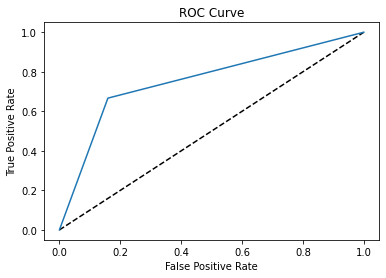

In [177]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [181]:
lr = LogisticRegression(penalty = 'l2', C = 0.001, random_state = 0)
lr.fit(X_eğitim,y_eğitim)

LogisticRegression(C=0.001, random_state=0)

In [182]:
tahmin_eğitim = log_reg.predict(X_eğitim)
tahmin_test = log_reg.predict(X_test)

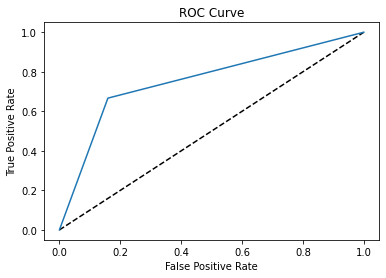

In [183]:
fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [178]:
print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test))

AUC Değeri :  0.7536873156342182
